In [1]:
Pump it Up: Data Mining the Water Table

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.utils import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from pandas.plotting import parallel_coordinates
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline
import missingno as msno
from fancyimpute import IterativeImputer

In [3]:
# function to create density plot
def impute_checker(feature, imputed_dataset, title):
    train[feature].plot(kind="kde", c="black")
    imputed_dataset[feature].plot(kind="kde", style="--", c="#66c2a5")
    labels = ["Original df", "Imputed df"]
    plt.legend(labels)
    plt.xlabel(feature)
    plt.title(title)
    plt.show()

In [4]:
train = pd.read_csv("/Users/sebaie/Desktop/Training_set_values.csv")
labels = pd.read_csv("/Users/sebaie/Desktop/Training_set_labels.csv")
test = pd.read_csv("/Users/sebaie/Desktop/Test_set_values.csv")
test_labels = pd.read_csv("/Users/sebaie/Desktop/SubmissionFormat.csv")
mean_mode_train = train.copy()

In [5]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [7]:
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [8]:
train.shape

(59400, 40)

In [9]:
labels.shape

(59400, 2)

In [10]:
test.shape

(14850, 40)

In [11]:
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [12]:
test.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [15]:
train = train.merge(labels, on="id", how="right")
train.head(15)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [16]:
# concatenate train and test for data visualization
raw = pd.concat([train, test])
raw.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [17]:
train['status_group'].value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

In [18]:
# for column in train.columns:
#     train[column].fillna(train[column].mode()[0], inplace=True)
# for column in test.columns:
#     test[column].fillna(test[column].mode()[0], inplace=True)

In [19]:
# for column in train.columns:
#     train[column].fillna(train[column].median(), inplace=True)
# for column in test.columns:
#     test[column].fillna(test[column].median(), inplace=True)

In [20]:
# print(f"Number of rows in original dataframe = {train.shape[0]}")
# train2 = train.dropna()
# print(f"Number of rows in original dataframe = {train2.shape[0]}")

In [21]:
train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [22]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(46743, 11615)

In [23]:
missing = round((raw.isna().sum())/len(raw)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(15)

scheme_name          48.6
status_group         20.0
scheme_management     6.5
funder                6.1
installer             6.1
public_meeting        5.6
permit                5.1
subvillage            0.6
latitude              0.0
quantity              0.0
management            0.0
management_group      0.0
payment               0.0
payment_type          0.0
water_quality         0.0
dtype: float64

<Axes: >

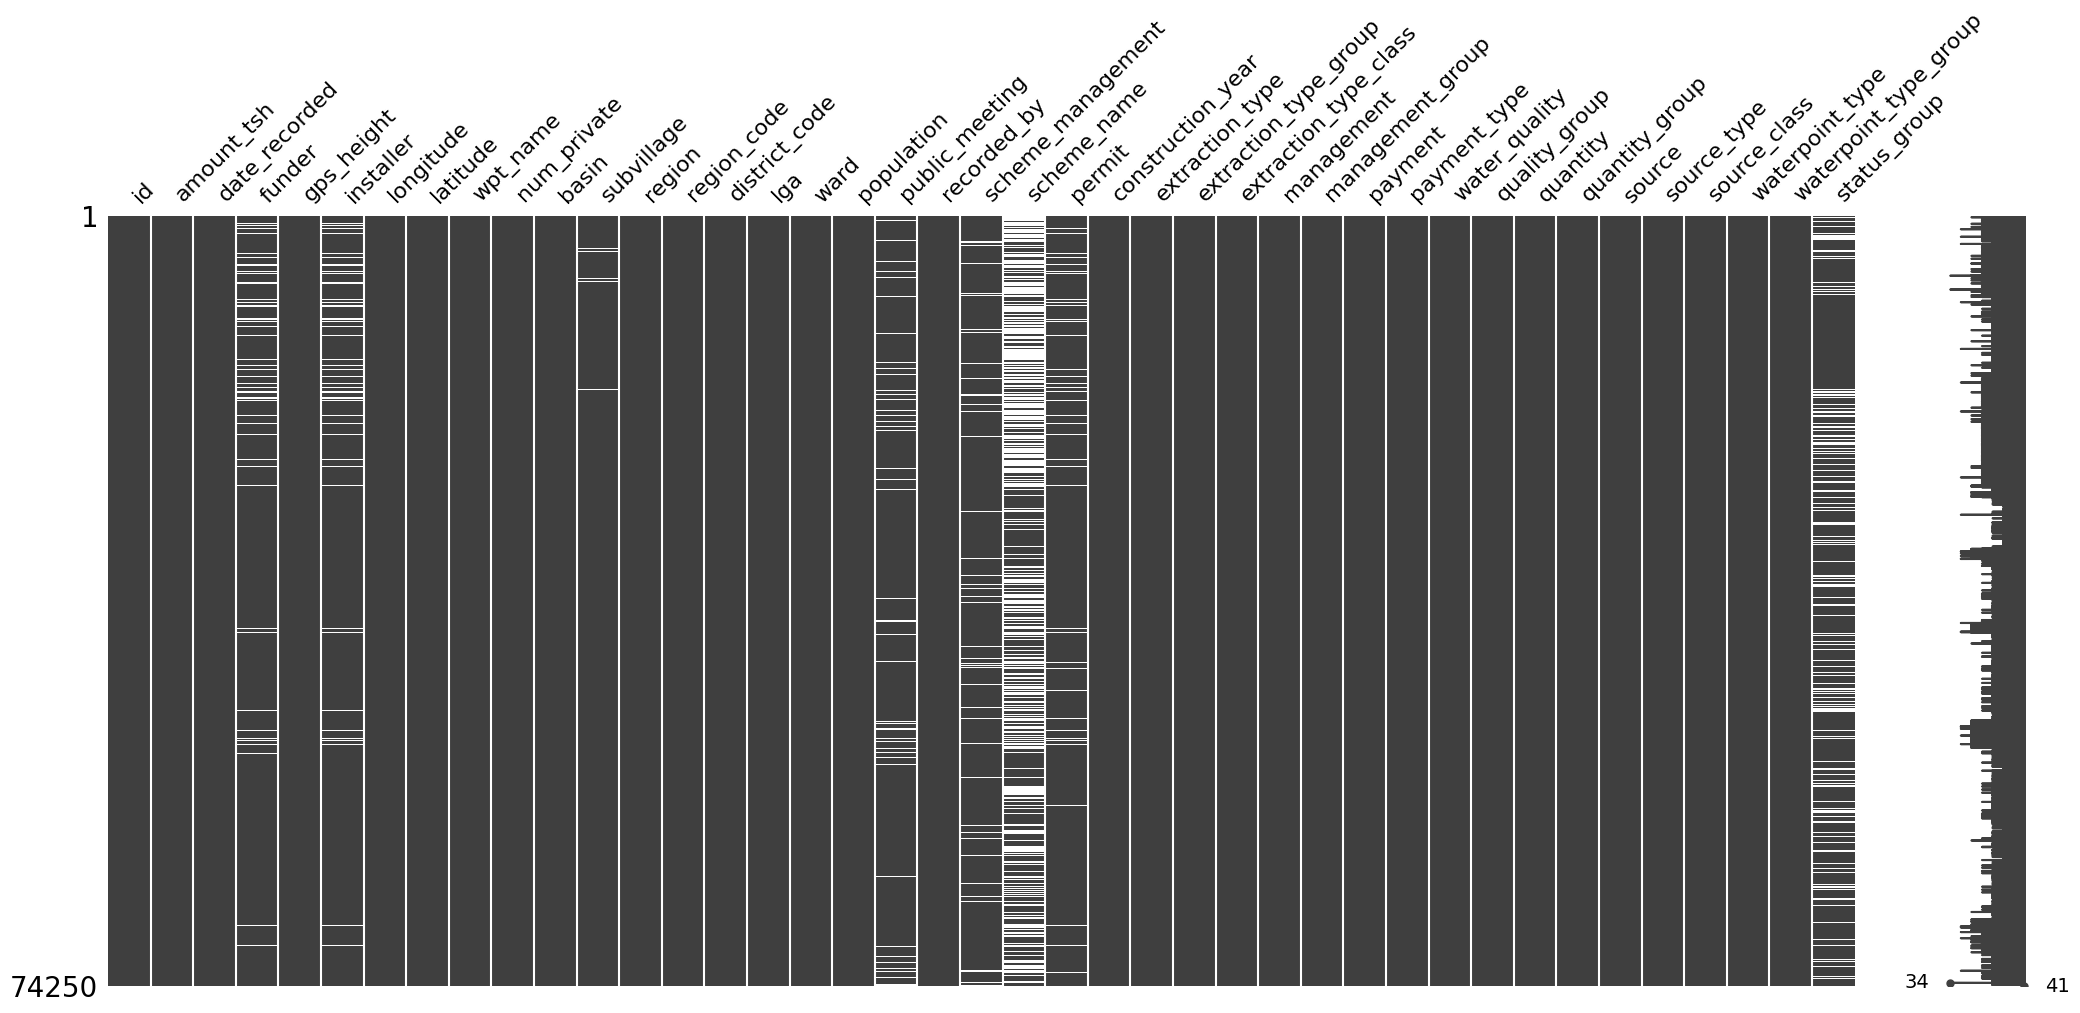

In [24]:
sorted = raw.sort_values("construction_year")
msno.matrix(sorted)

In [25]:
train.date_recorded = train["date_recorded"].str.replace("-", "")
train.date_recorded = train.date_recorded.str[:4]
train.date_recorded = train.date_recorded.astype(int)

test.date_recorded = test["date_recorded"].str.replace("-", "")
test.date_recorded = test.date_recorded.str[:4]
test.date_recorded = test.date_recorded.astype(int)

train.date_recorded

0        2011
1        2013
2        2013
3        2013
4        2011
         ... 
59395    2013
59396    2011
59397    2011
59398    2011
59399    2011
Name: date_recorded, Length: 59400, dtype: int64

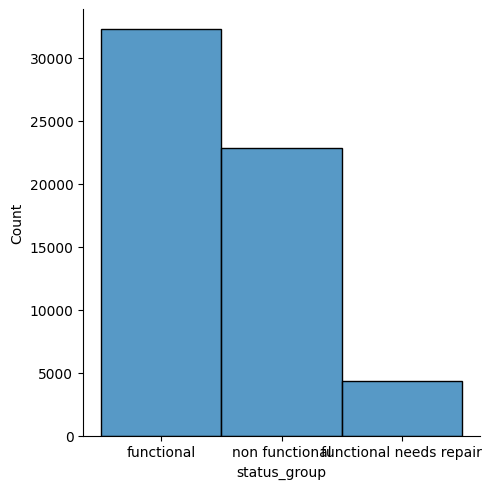

In [26]:
sns.displot(train["status_group"])

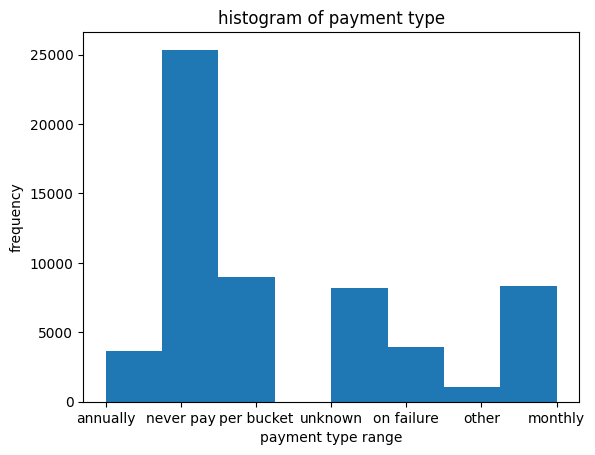

In [27]:
plt.hist(train["payment_type"],bins=8,histtype='bar',rwidth=1)
plt.title('histogram of payment type')
plt.xlabel('payment type range')
plt.ylabel('frequency')
plt.show()

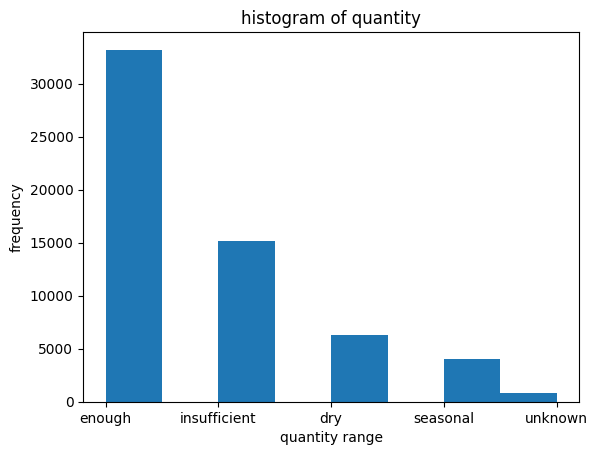

In [28]:
plt.hist(train["quantity"],bins=8,histtype='bar',rwidth=1)
plt.title('histogram of quantity')
plt.xlabel('quantity range')
plt.ylabel('frequency')
plt.show()

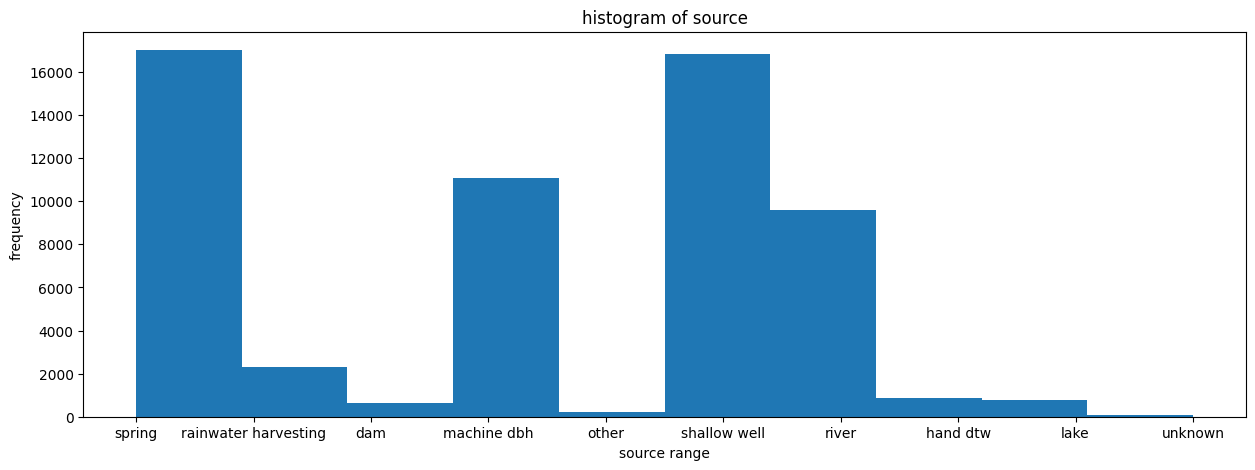

In [29]:
plt.figure(figsize=(15, 5))
plt.hist(train["source"],bins=10,histtype='bar',rwidth=1)
plt.title('histogram of source')
plt.xlabel('source range')
plt.ylabel('frequency')
plt.show()

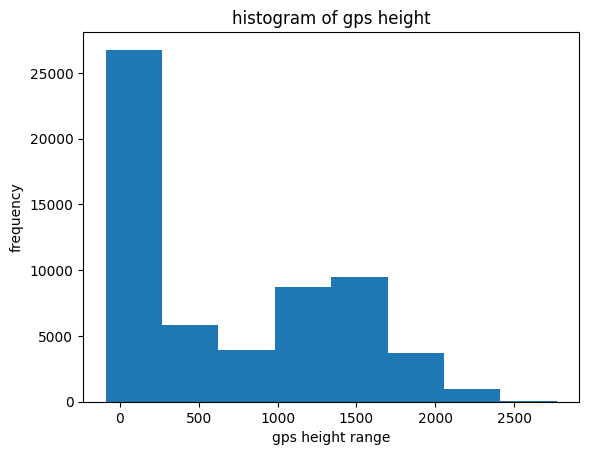

In [30]:
plt.hist(train["gps_height"],bins=8,histtype='bar',rwidth=1)
plt.title('histogram of gps height')
plt.xlabel('gps height range')
plt.ylabel('frequency')
plt.show()

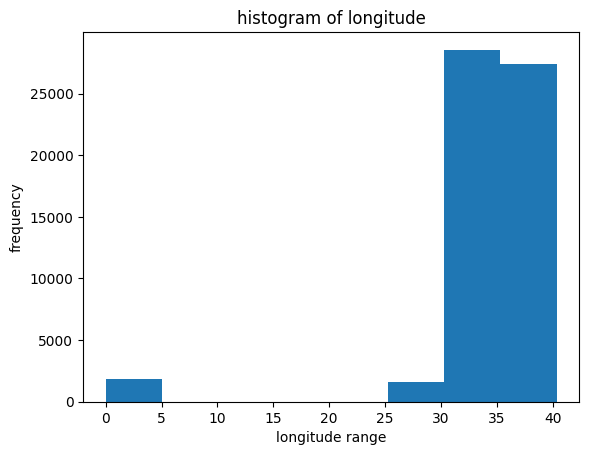

In [31]:
plt.hist(train["longitude"],bins=8,histtype='bar',rwidth=1)
plt.title('histogram of longitude')
plt.xlabel('longitude range')
plt.ylabel('frequency')
plt.show()

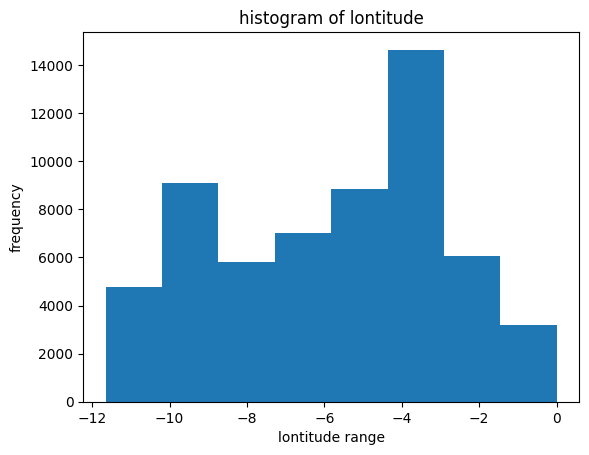

In [32]:
plt.hist(train["latitude"],bins=8,histtype='bar',rwidth=1)
plt.title('histogram of lontitude')
plt.xlabel('lontitude range')
plt.ylabel('frequency')
plt.show()

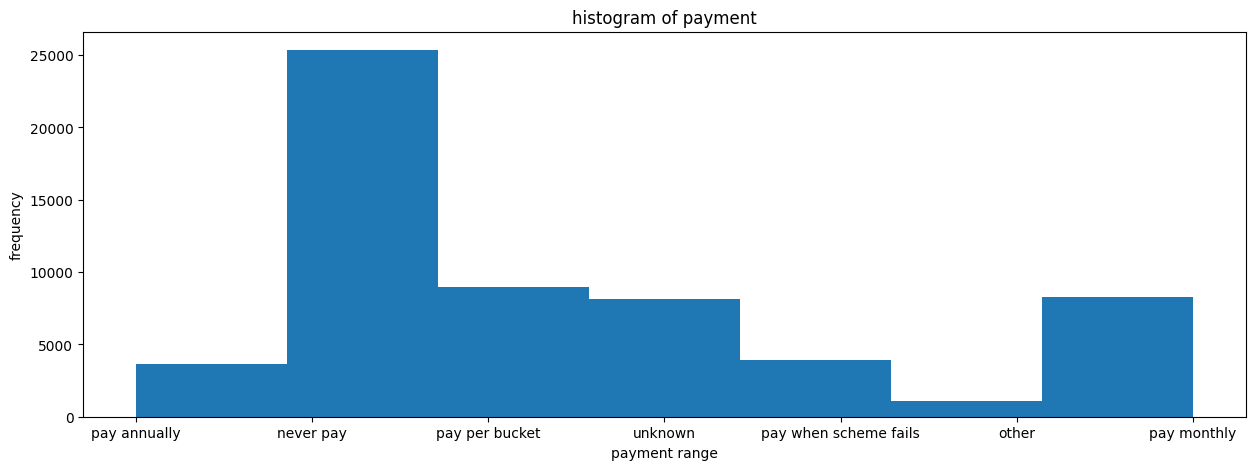

In [33]:
plt.figure(figsize=(15, 5))
plt.hist(train["payment"],bins=7,histtype='bar',rwidth=1)
plt.title('histogram of payment')
plt.xlabel('payment range')
plt.ylabel('frequency')
plt.show()

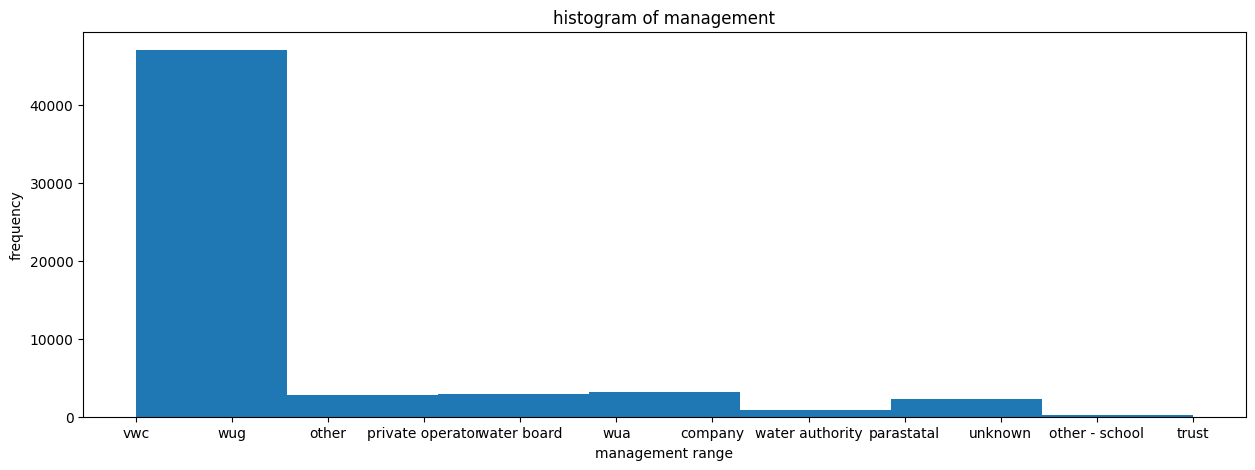

In [34]:
plt.figure(figsize=(15, 5))
plt.hist(train["management"],bins=7,histtype='bar',rwidth=1)
plt.title('histogram of management')
plt.xlabel('management range')
plt.ylabel('frequency')
plt.show()

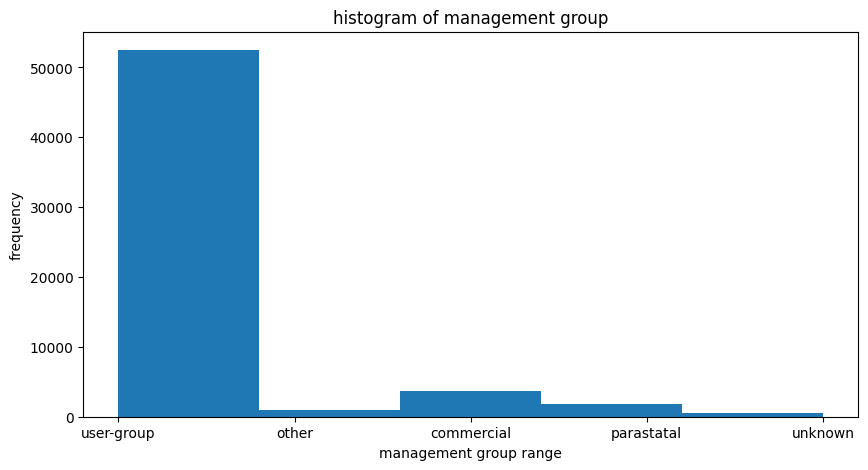

In [35]:
plt.figure(figsize=(10, 5))
plt.hist(train["management_group"],bins=5,histtype='bar',rwidth=1)
plt.title('histogram of management group')
plt.xlabel('management group range')
plt.ylabel('frequency')
plt.show()

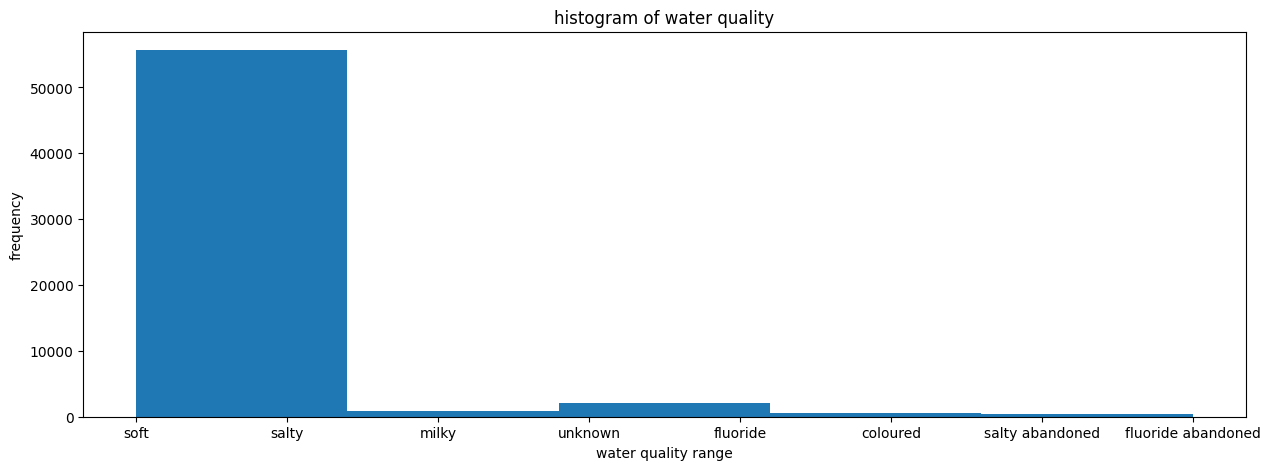

In [36]:
plt.figure(figsize=(15, 5))
plt.hist(train["water_quality"],bins=5,histtype='bar',rwidth=1)
plt.title('histogram of water quality')
plt.xlabel('water quality range')
plt.ylabel('frequency')
plt.show()

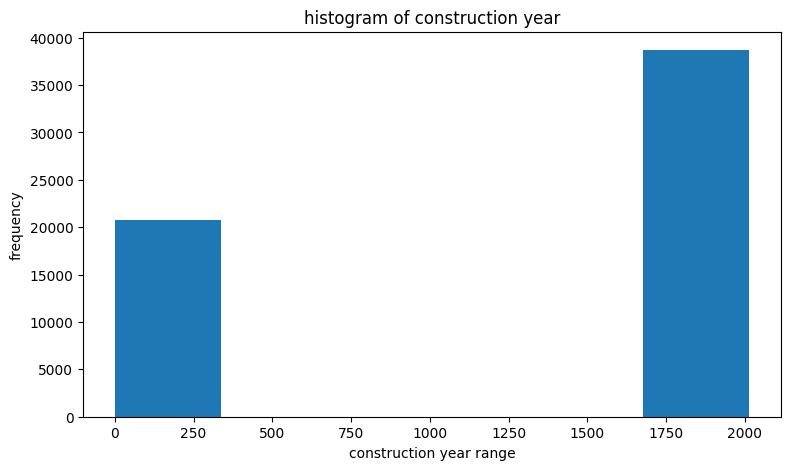

In [37]:
plt.figure(figsize=(9, 5))
plt.hist(train["construction_year"],bins=6,histtype='bar',rwidth=1)
plt.title('histogram of construction year')
plt.xlabel('construction year range')
plt.ylabel('frequency')
plt.show()

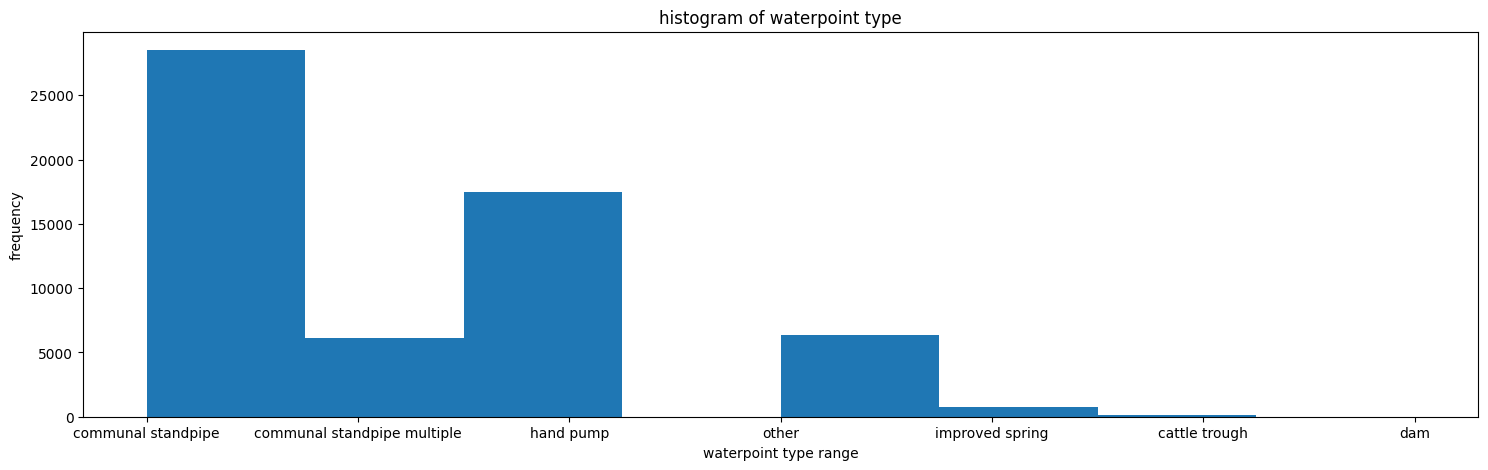

In [38]:
plt.figure(figsize=(18, 5))
plt.hist(train["waterpoint_type"],bins=8,histtype='bar',rwidth=1)
plt.title('histogram of waterpoint type')
plt.xlabel('waterpoint type range')
plt.ylabel('frequency')
plt.show()

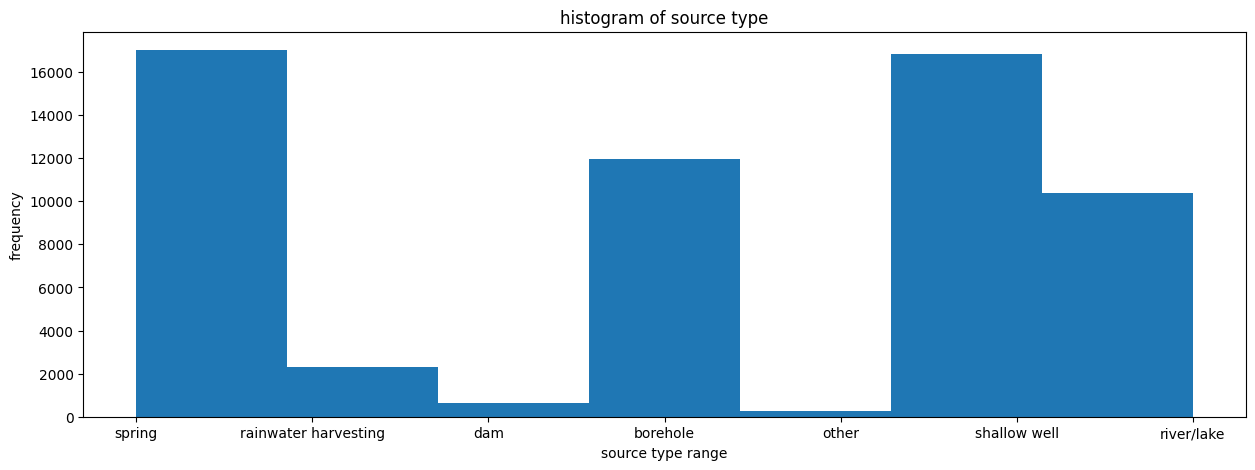

In [39]:
plt.figure(figsize=(15, 5))
plt.hist(train["source_type"],bins=7,histtype='bar',rwidth=1)
plt.title('histogram of source type')
plt.xlabel('source type range')
plt.ylabel('frequency')
plt.show()

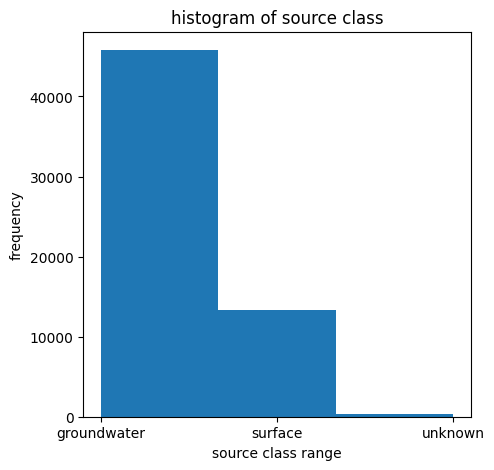

In [40]:
plt.figure(figsize=(5, 5))
plt.hist(train["source_class"],bins=3,histtype='bar',rwidth=1)
plt.title('histogram of source class')
plt.xlabel('source class range')
plt.ylabel('frequency')
plt.show()

In [41]:
print(Counter(train.status_group))

Counter({'functional': 32259, 'non functional': 22824, 'functional needs repair': 4317})


In [42]:
train.status_group.value_counts(normalize=True) * 100

status_group
functional                 54.308081
non functional             38.424242
functional needs repair     7.267677
Name: proportion, dtype: float64

In [43]:
l = preprocessing.LabelEncoder()

train.status_group = l.fit_transform(train.status_group)
train.status_group.head(20)

0     0
1     0
2     0
3     2
4     0
5     0
6     2
7     2
8     2
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    2
17    2
18    1
19    0
Name: status_group, dtype: int64

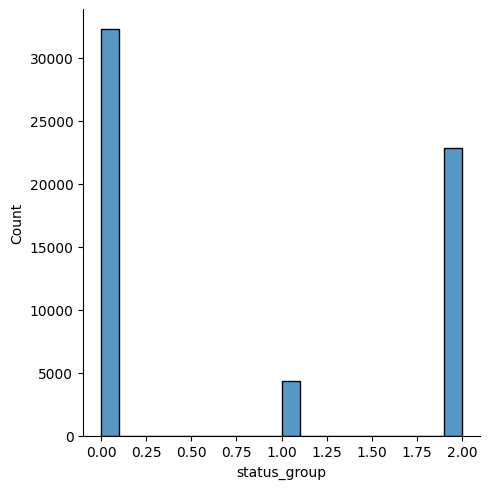

In [44]:
sns.displot(train["status_group"])

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  int64  
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [46]:
enc = OrdinalEncoder()

train.funder = enc.fit_transform(train.funder.values.reshape(-1, 1))
train.installer = enc.fit_transform(train.installer.values.reshape(-1, 1))
train.wpt_name = enc.fit_transform(train.wpt_name.values.reshape(-1, 1))
train.basin = enc.fit_transform(train.basin.values.reshape(-1, 1))
train.subvillage = enc.fit_transform(train.subvillage.values.reshape(-1, 1))
train.region = enc.fit_transform(train.region.values.reshape(-1, 1))
train.lga = enc.fit_transform(train.lga.values.reshape(-1, 1))
train.ward = enc.fit_transform(train.ward.values.reshape(-1, 1))
train.public_meeting = enc.fit_transform(train.public_meeting.values.reshape(-1, 1))
train.recorded_by = enc.fit_transform(train.recorded_by.values.reshape(-1, 1))
train.scheme_management = enc.fit_transform(train.scheme_management.values.reshape(-1, 1))
train.scheme_name = enc.fit_transform(train.scheme_name.values.reshape(-1, 1))
train.permit = enc.fit_transform(train.permit.values.reshape(-1, 1))
train.extraction_type = enc.fit_transform(train.extraction_type.values.reshape(-1, 1))
train.extraction_type_group = enc.fit_transform(train.extraction_type_group.values.reshape(-1, 1))
train.extraction_type_class = enc.fit_transform(train.extraction_type_class.values.reshape(-1, 1))
train.management = enc.fit_transform(train.management.values.reshape(-1, 1))
train.management_group = enc.fit_transform(train.management_group.values.reshape(-1, 1))
train.payment = enc.fit_transform(train.payment.values.reshape(-1, 1))
train.payment_type = enc.fit_transform(train.payment_type.values.reshape(-1, 1))
train.water_quality = enc.fit_transform(train.water_quality.values.reshape(-1, 1))
train.quality_group = enc.fit_transform(train.quality_group.values.reshape(-1, 1))
train.quantity = enc.fit_transform(train.quantity.values.reshape(-1, 1))
train.quantity_group = enc.fit_transform(train.quantity_group.values.reshape(-1, 1))
train.source = enc.fit_transform(train.source.values.reshape(-1, 1))
train.source_type = enc.fit_transform(train.source_type.values.reshape(-1, 1))
train.source_class = enc.fit_transform(train.source_class.values.reshape(-1, 1))
train.waterpoint_type = enc.fit_transform(train.waterpoint_type.values.reshape(-1, 1))
train.waterpoint_type_group = enc.fit_transform(train.waterpoint_type_group.values.reshape(-1, 1))

test.funder = enc.fit_transform(test.funder.values.reshape(-1, 1))
test.installer = enc.fit_transform(test.installer.values.reshape(-1, 1))
test.wpt_name = enc.fit_transform(test.wpt_name.values.reshape(-1, 1))
test.basin = enc.fit_transform(test.basin.values.reshape(-1, 1))
test.subvillage = enc.fit_transform(test.subvillage.values.reshape(-1, 1))
test.region = enc.fit_transform(test.region.values.reshape(-1, 1))
test.lga = enc.fit_transform(test.lga.values.reshape(-1, 1))
test.ward = enc.fit_transform(test.ward.values.reshape(-1, 1))
test.public_meeting = enc.fit_transform(test.public_meeting.values.reshape(-1, 1))
test.recorded_by = enc.fit_transform(test.recorded_by.values.reshape(-1, 1))
test.scheme_management = enc.fit_transform(test.scheme_management.values.reshape(-1, 1))
test.scheme_name = enc.fit_transform(test.scheme_name.values.reshape(-1, 1))
test.permit = enc.fit_transform(test.permit.values.reshape(-1, 1))
test.extraction_type = enc.fit_transform(test.extraction_type.values.reshape(-1, 1))
test.extraction_type_group = enc.fit_transform(test.extraction_type_group.values.reshape(-1, 1))
test.extraction_type_class = enc.fit_transform(test.extraction_type_class.values.reshape(-1, 1))
test.management = enc.fit_transform(test.management.values.reshape(-1, 1))
test.management_group = enc.fit_transform(test.management_group.values.reshape(-1, 1))
test.payment = enc.fit_transform(test.payment.values.reshape(-1, 1))
test.payment_type = enc.fit_transform(test.payment_type.values.reshape(-1, 1))
test.water_quality = enc.fit_transform(test.water_quality.values.reshape(-1, 1))
test.quality_group = enc.fit_transform(test.quality_group.values.reshape(-1, 1))
test.quantity = enc.fit_transform(test.quantity.values.reshape(-1, 1))
test.quantity_group = enc.fit_transform(test.quantity_group.values.reshape(-1, 1))
test.source = enc.fit_transform(test.source.values.reshape(-1, 1))
test.source_type = enc.fit_transform(test.source_type.values.reshape(-1, 1))
test.source_class = enc.fit_transform(test.source_class.values.reshape(-1, 1))
test.waterpoint_type = enc.fit_transform(test.waterpoint_type.values.reshape(-1, 1))
test.waterpoint_type_group = enc.fit_transform(test.waterpoint_type_group.values.reshape(-1, 1))

In [47]:
print('Covariance: ')
train.cov()

Covariance: 


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,4.602367e+08,-3.421768e+05,43.764409,-81276.997954,-69771.636130,-8649.972981,-189.886176,108.608372,-5.032399e+05,-690.051619,...,-22.767485,61.530550,-17.129627,-17.129627,-65.721673,-145.474209,-51.795711,-90.623250,-106.077678,82.507285
amount_tsh,-3.421768e+05,8.985453e+06,-13.631541,9550.166622,159253.860598,24497.768480,435.741254,-465.125716,5.281755e+05,107.973107,...,34.089230,-56.409681,-34.998292,-34.998292,7.321300,-4.668922,45.445655,-234.002280,-174.197961,-152.894531
date_recorded,4.376441e+01,-1.363154e+01,0.919216,0.913399,211.568310,11.113365,0.068803,0.452737,-1.004090e+03,-0.162087,...,0.009002,0.025286,0.028902,0.028902,-0.111297,-0.165053,-0.012381,0.032395,0.007922,0.018551
funder,-8.127700e+04,9.550167e+03,0.913399,329744.636325,-2278.874046,173839.106290,-154.700118,77.966580,1.798190e+04,88.361311,...,-22.462090,7.400973,13.566199,13.566199,-103.388793,-117.749451,8.816565,69.418028,38.547954,-31.712152
gps_height,-6.977164e+04,1.592539e+05,211.568310,-2278.874046,480410.275088,8262.692593,678.954545,-73.001933,4.634752e+05,61.376935,...,87.698870,-50.158544,-17.147908,-17.147908,171.299419,188.867841,12.628127,-292.335362,-206.434645,-75.067317
installer,-8.649973e+03,2.449777e+04,11.113365,173839.106290,8262.692593,323011.364098,28.132779,47.008461,6.538014e+04,116.644676,...,1.885072,-3.346562,12.982595,12.982595,-123.482147,-118.900845,12.064117,49.156710,25.221981,-19.419348
longitude,-1.898862e+02,4.357413e+02,0.068803,-154.700118,678.954545,28.132779,43.131161,-8.238326,-1.371683e+03,1.918474,...,-0.305398,-0.164335,0.083323,0.083323,-0.176719,-0.683434,0.058714,-1.911162,-1.309552,0.027233
latitude,1.086084e+02,-4.651257e+02,0.452737,77.966580,-73.001933,47.008461,-8.238326,8.679028,-2.203820e+03,0.246455,...,-0.029072,0.089350,0.277498,0.277498,0.147088,0.417297,-0.052344,0.840371,0.593992,-0.040704
wpt_name,-5.032399e+05,5.281755e+05,-1004.090262,17981.897516,463475.217120,65380.141624,-1371.682629,-2203.820193,1.443124e+08,397.177150,...,153.793157,-167.039653,197.759858,197.759858,43.256542,-6.907009,72.328436,-568.147451,-391.713327,-231.214382
num_private,-6.900516e+02,1.079731e+02,-0.162087,88.361311,61.376935,116.644676,1.918474,0.246455,3.971772e+02,149.725320,...,-0.016901,-0.060632,0.034855,0.034855,-0.196972,-0.284647,0.046584,-0.479414,-0.335463,-0.058359


In [48]:
print('Correlation: ')
train.corr()

Correlation: 


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,1.000000,-0.005321,0.002128,-0.006599,-0.004692,-0.000710,-0.001348,0.001718,-0.001953,-0.002629,...,-0.001178,0.003657,-0.000993,-0.000993,-0.001506,-0.003094,-0.005561,-0.002371,-0.003586,0.004049
amount_tsh,-0.005321,1.000000,-0.004743,0.006145,0.076650,0.015924,0.022134,-0.052670,0.014667,0.002944,...,0.012624,-0.023995,-0.014526,-0.014526,0.001201,-0.000711,0.034922,-0.043821,-0.042143,-0.053702
date_recorded,0.002128,-0.004743,1.000000,0.001663,0.318373,0.020449,0.010927,0.160288,-0.087178,-0.013816,...,0.010423,0.033628,0.037506,0.037506,-0.057067,-0.078544,-0.029746,0.018967,0.005992,0.020372
funder,-0.006599,0.006145,0.001663,1.000000,-0.005740,0.532804,-0.039932,0.045979,0.002605,0.012206,...,-0.044473,0.017190,0.030195,0.030195,-0.088208,-0.093782,0.035694,0.067930,0.048586,-0.058011
gps_height,-0.004692,0.076650,0.318373,-0.005740,1.000000,0.021027,0.149155,-0.035751,0.055663,0.007237,...,0.140459,-0.092273,-0.030781,-0.030781,0.121495,0.124323,0.041968,-0.236758,-0.215989,-0.114029
installer,-0.000710,0.015924,0.020449,0.532804,0.021027,1.000000,0.007346,0.028008,0.009573,0.016278,...,0.003777,-0.007866,0.029231,0.029231,-0.106451,-0.095684,0.049333,0.048613,0.032131,-0.035890
longitude,-0.001348,0.022134,0.010927,-0.039932,0.149155,0.007346,1.000000,-0.425802,-0.017386,0.023873,...,-0.051622,-0.031906,0.015785,0.015785,-0.013228,-0.047479,0.020594,-0.163355,-0.144605,0.004366
latitude,0.001718,-0.052670,0.160288,0.045979,-0.035751,0.028008,-0.425802,1.000000,-0.062271,0.006837,...,-0.010955,0.038672,0.117193,0.117193,0.024544,0.064626,-0.040928,0.160127,0.146218,-0.014547
wpt_name,-0.001953,0.014667,-0.087178,0.002605,0.055663,0.009573,-0.017386,-0.062271,1.000000,0.002702,...,0.014214,-0.017730,0.020481,0.020481,0.001770,-0.000262,0.013869,-0.026549,-0.023647,-0.020265
num_private,-0.002629,0.002944,-0.013816,0.012206,0.007237,0.016278,0.023873,0.006837,0.002702,1.000000,...,-0.001533,-0.006318,0.003544,0.003544,-0.007913,-0.010613,0.008769,-0.021993,-0.019882,-0.005021


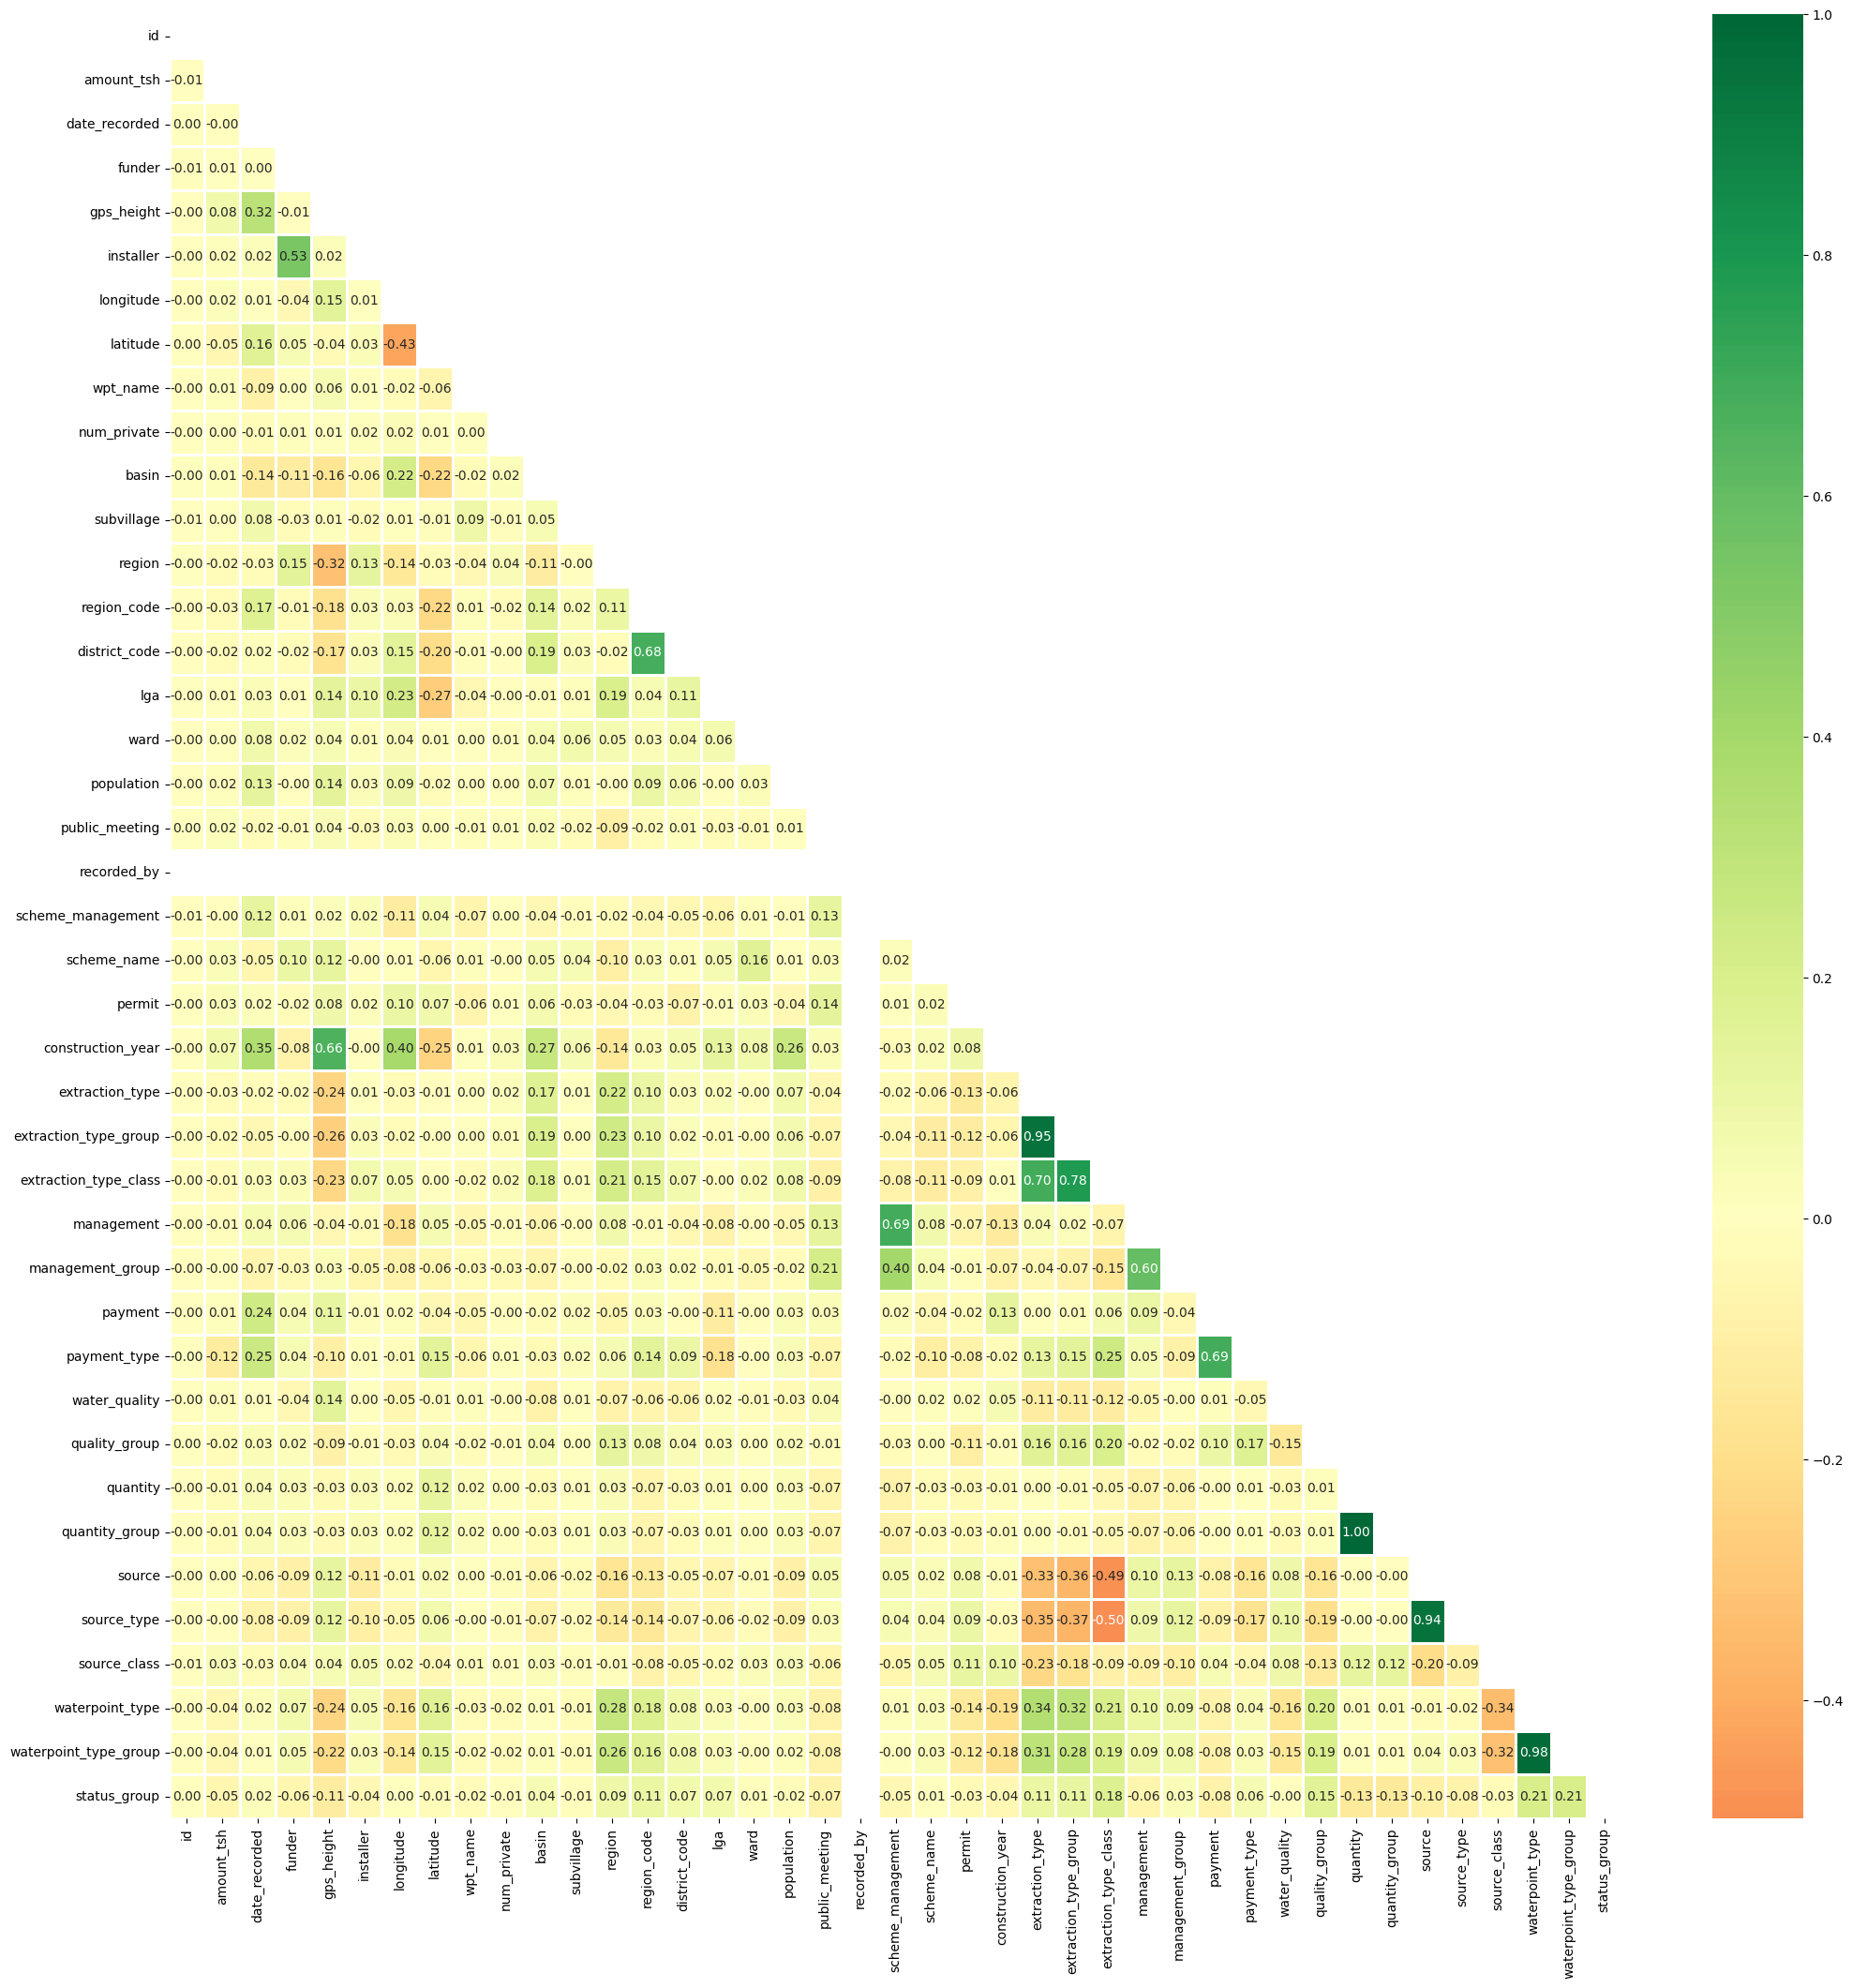

In [49]:
# Create the correlation matrix
corr_mean = train.corr(method = 'pearson')

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(25,25)) 
ax = sns.heatmap(corr_mean, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_xticklabels())
plt.show()

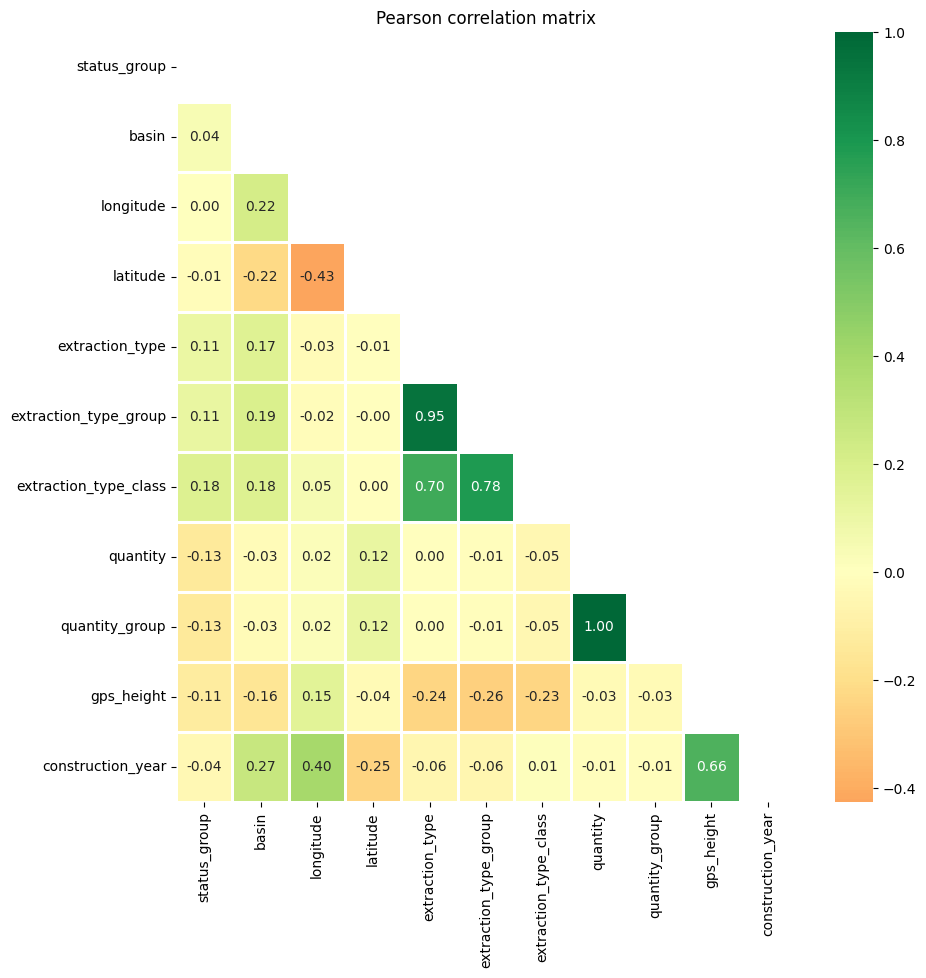

In [50]:
# Create the correlation matrix
variables = ['status_group', 'basin', 'longitude', 'latitude', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'quantity', 'quantity_group', 'gps_height', 'construction_year']
corr_mean = train[variables].corr(method = 'pearson')

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(corr_mean, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Pearson correlation matrix')
plt.show()

<Axes: >

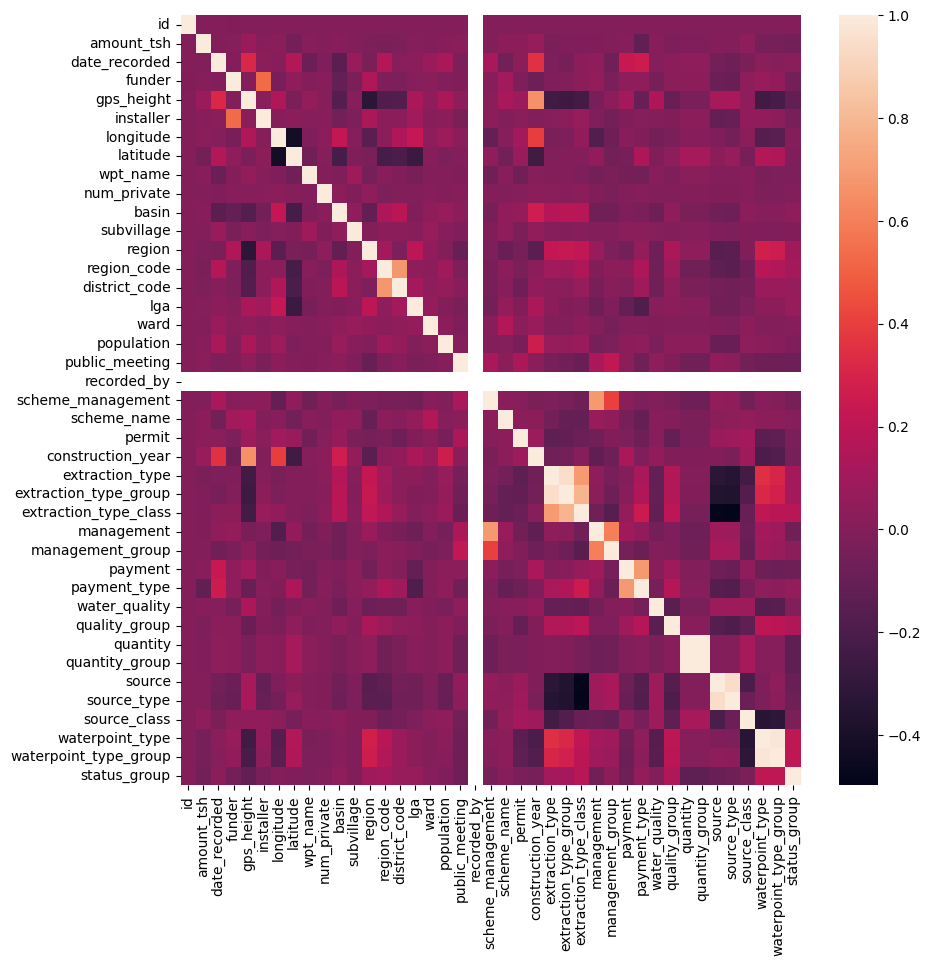

In [51]:
plt.figure(figsize=(10, 10))
cmap = train.corr()
sns.heatmap(cmap)

In [52]:
for column in train.columns:
    if column != 'status_group':
        print(f"{column}")
        print(f"\t Mean = {train[column].mean():.2f}")
        print(f"\t Standard deviation = {train[column].std():.2f}")
        print(f"\t Minimum = {train[column].min()}")
        print('\t Maximum = %.2f' % train[column].max())

id
	 Mean = 37115.13
	 Standard deviation = 21453.13
	 Minimum = 0
	 Maximum = 74247.00
amount_tsh
	 Mean = 317.65
	 Standard deviation = 2997.57
	 Minimum = 0.0
	 Maximum = 350000.00
date_recorded
	 Mean = 2011.92
	 Standard deviation = 0.96
	 Minimum = 2002
	 Maximum = 2013.00
funder
	 Mean = 834.45
	 Standard deviation = 574.23
	 Minimum = 0.0
	 Maximum = 1895.00
gps_height
	 Mean = 668.30
	 Standard deviation = 693.12
	 Minimum = -90
	 Maximum = 2770.00
installer
	 Mean = 742.96
	 Standard deviation = 568.34
	 Minimum = 0.0
	 Maximum = 2144.00
longitude
	 Mean = 34.08
	 Standard deviation = 6.57
	 Minimum = 0.0
	 Maximum = 40.35
latitude
	 Mean = -5.71
	 Standard deviation = 2.95
	 Minimum = -11.64944018
	 Maximum = -0.00
wpt_name
	 Mean = 21101.80
	 Standard deviation = 12013.01
	 Minimum = 0.0
	 Maximum = 37398.00
num_private
	 Mean = 0.47
	 Standard deviation = 12.24
	 Minimum = 0
	 Maximum = 1776.00
basin
	 Mean = 4.08
	 Standard deviation = 2.47
	 Minimum = 0.0
	 Maximum = 8.0

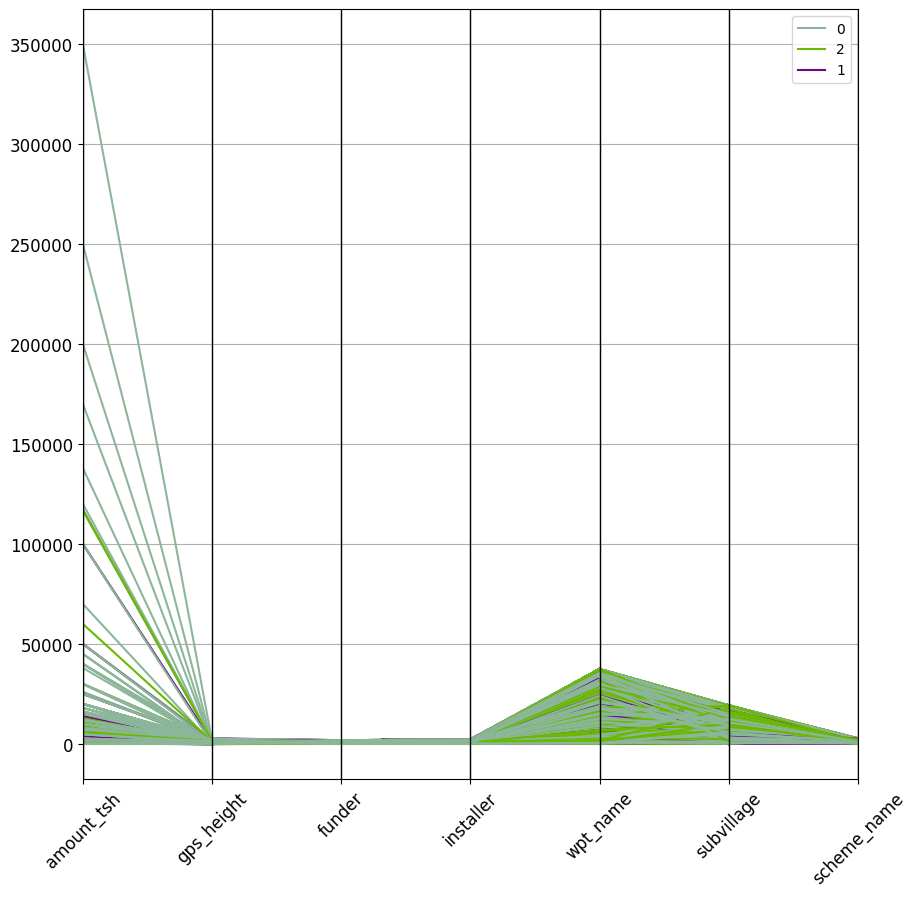

In [53]:
# Select specific columns
selected_columns = train.loc[:, ["amount_tsh", "gps_height", "funder", "installer", "wpt_name", "subvillage", "scheme_name", "status_group"]]

# Transfer to another variable
sample = selected_columns.copy()
# sample = sample.sample(n=500)

# Customize axis labels and ticks
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
parallel_coordinates(sample, 'status_group')
plt.legend()
plt.show()

In [54]:
y = train["status_group"]
X = train.drop(
    [
        "id",
        "status_group",
        "funder",
        "installer",
        "wpt_name",
        "subvillage",
        "lga",
        "ward",
        "recorded_by",
        "scheme_name",
        "extraction_type_group",
        "extraction_type_class",
        "payment_type",
        "quality_group",
        "quantity_group",
        "source_type",
        "source_class",
        "waterpoint_type_group",
    ],
    axis=1,
)
X_test = test.drop(
    [
        "id",
        "funder",
        "installer",
        "wpt_name",
        "subvillage",
        "lga",
        "ward",
        "recorded_by",
        "scheme_name",
        "extraction_type_group",
        "extraction_type_class",
        "payment_type",
        "quality_group",
        "quantity_group",
        "source_type",
        "source_class",
        "waterpoint_type_group",
    ],
    axis=1,
)

In [55]:
# y = train['status_group']
# X = train.drop(['id', 'status_group'], axis=1)
# X_test = test.drop(['id'], axis=1)

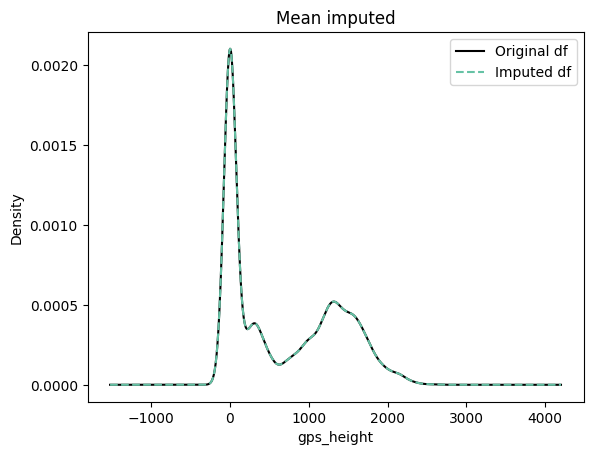

In [56]:
impute_checker("gps_height", mean_mode_train, "Mean imputed")

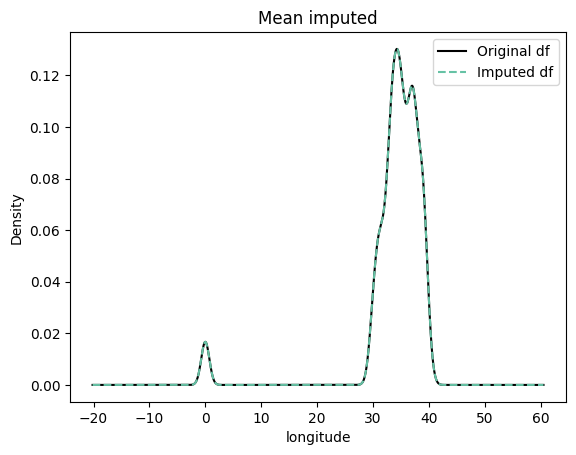

In [57]:
impute_checker("longitude", mean_mode_train, "Mean imputed")

In [58]:
for column in X.columns:
    X[column].fillna(X[column].mean(), inplace=True)
for column in X_test.columns:
    X_test[column].fillna(X_test[column].mean(), inplace=True)

In [59]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=1
)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 23), (11880, 23), (47520,), (11880,))

In [60]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [61]:
class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.6134066529837742, 1: 4.574068726537684, 2: 0.8687068114511353}

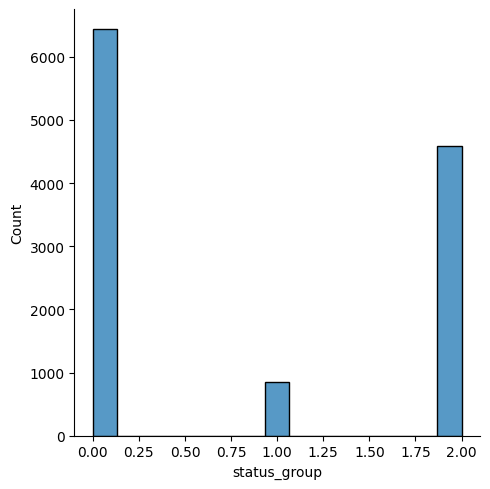

In [62]:
sns.displot(y_val)

In [63]:
print(Counter(y_val))

Counter({0: 6436, 2: 4590, 1: 854})


In [64]:
y_val.value_counts(normalize=True) * 100

status_group
0    54.175084
2    38.636364
1     7.188552
Name: proportion, dtype: float64

In [65]:
# Define and fit a random forest classifier
rf_clf = RandomForestClassifier(
    criterion="gini",
    min_samples_split=6,
    n_estimators=200,
    max_features="auto",
    oob_score=True,
    random_state=1,
    n_jobs=-1,
)
rf_clf.fit(X_train, y_train)

# Evaluate the random forest classifier on the validation set
pred = rf_clf.predict(X_val)
rf_val_acc = rf_clf.score(X_val, y_val)
print("Random Forest Validation Accuracy:", rf_val_acc)

# Make predictions on the test set using the random forest classifier
y_pred = rf_clf.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Validation Accuracy: 0.8135521885521886


In [66]:
# rf = RandomForestClassifier(
#     criterion="gini",
#     min_samples_split=6,
#     n_estimators=200,
#     max_depth=30,
#     oob_score=True,
#     random_state=1,
#     n_jobs=-1,)
# bag = BaggingClassifier(max_features=0.4, n_estimators=1000, random_state=1)
# ada = AdaBoostClassifier(n_estimators=500, random_state=42)
# gb = GradientBoostingClassifier(n_estimators=500, learning_rate=42, min_samples_split=6, random_state=1)

# rf = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=225, random_state=42, warm_start=True)
# xgb = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 42) 
# cat = CatBoostClassifier(max_depth = 9, rsm = 0.2, iterations = 1000, random_state = 42)
# bag = BaggingClassifier(max_features=0.4, n_estimators=1000, random_state=42)

In [67]:
# vc = VotingClassifier([('rf', rf), ('ada', ada), ('bag', bag), ('gb', gb)], voting = 'soft')
# vc.fit(X_train , y_train)

# # Evaluate the voting classifier on the validation set
# pred = vc.predict(X_val)
# vc_val_acc = vc.score(X_val, y_val)
# print("voting classifier Validation Accuracy:", vc_val_acc)

# # Make predictions on the test set using the voting classifier
# y_pred = vc.predict(X_test)

In [68]:
# vc = VotingClassifier([('rf', rf), ('ada', ada), ('bag', bag), ('gb', gb)], voting = 'soft', weights = [1, 0.85, 0.75, 0.5])
# vc.fit(X_train , y_train)

# # Evaluate the voting classifier on the validation set
# pred = vc.predict(X_val)
# vc_val_acc = vc.score(X_val, y_val)
# print("voting classifier Validation Accuracy:", vc_val_acc)

# # Make predictions on the test set using the voting classifier
# y_pred = vc.predict(X_test)

In [69]:
# vc = VotingClassifier([('rf', rf), ('xgb', xgb), ('cat', cat), ('bag', bag)], voting = 'soft', weights = [0.85, 1, 0.85, 0.75])
# vc.fit(X_train , y_train)

# # Evaluate the voting classifier on the validation set
# pred = vc.predict(X_val)
# vc_val_acc = vc.score(X_val, y_val)
# print("voting classifier Validation Accuracy:", vc_val_acc)

# # Make predictions on the test set using the voting classifier
# y_pred = vc.predict(X_test)

In [70]:
# # Define and fit a bagging Classifier
# bag = BaggingClassifier(random_state=42, n_estimators = 1000, max_features = 0.4)
# bag.fit(X_train, y_train)

# # Evaluate the bagging classifier on the validation set
# pred = bag.predict(X_val)
# bag_val_acc = bag.score(X_val, y_val)
# print("bagging classifier Validation Accuracy:", bag_val_acc)

# # Make predictions on the test set using the bagging classifier
# y_pred = bag.predict(X_test)

In [71]:
# # Define and fit a catboost Classifier
# cb = CatBoostClassifier(random_state=42, rsm = 0.2, max_depth =9, iterations = 1000)
# cb.fit(X_train, y_train)

# # Evaluate the catboost classifier on the validation set
# pred = cb.predict(X_val)
# cb_val_acc = cb.score(X_val, y_val)
# print("catboost classifier Validation Accuracy:", cb_val_acc)

# # Make predictions on the test set using the catboost classifier
# y_pred = cb.predict(X_test)

In [72]:
# # Define and fit a XGB Classifier
# xgb_clf = XGBClassifier(random_state=42, n_estimators = 200, colsample_bytree = 0.3, eta = 0.2, max_depth = 12)
# xgb_clf.fit(X_train, y_train,  eval_metric = 'mlogloss',)

# # Evaluate the XGB classifier on the validation set
# pred = xgb_clf.predict(X_val)
# xgb_val_acc = xgb_clf.score(X_val, y_val)
# print("XGB Validation Accuracy:", xgb_val_acc)

# # Make predictions on the test set using the XGB classifier
# y_pred = xgb_clf.predict(X_test)

In [73]:
# # Define and fit a Gradient Boosting classifier with additional parameters
# gb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=1, min_samples_split=6, random_state=1)
# gb_clf.fit(X_train, y_train)

# # Evaluate the Gradient Boosting classifier on the validation set
# pred = gb_clf.predict(X_val)
# gb_val_acc = gb_clf.score(X_val, y_val)
# print("Gradient Boosting Validation Accuracy:", gb_val_acc)

# # Make predictions on the test set using the Gradient Boosting classifier
# y_pred = gb_clf.predict(X_test)

In [74]:
# # Define and fit a  AdaBoostClassifier with a base estimator RandomForestClassifier with additional parameters
# ada_rf = AdaBoostClassifier(estimator=RandomForestClassifier(
#     criterion="gini",
#     min_samples_split=6,
#     n_estimators=200,
#     oob_score=True,
#     random_state=1,
#     n_jobs=-1,
#     )
# )
# ada_rf.fit(X_train, y_train)

# # Evaluate the model on the validation set
# pred = ada_rf.predict(X_val)
# ada_rf_val_acc = ada_rf.score(X_val, y_val)
# print("AdaBoostClassifier Validation Accuracy:", ada_rf_val_acc)

# # Make predictions on the test set using the AdaBoostClassifier
# y_pred = ada_rf.predict(X_test)

In [75]:
# # Define and fit an AdaBoost classifier
# ada_clf = AdaBoostClassifier(n_estimators=200, random_state=1)
# ada_clf.fit(X_train, y_train)

# # Evaluate the AdaBoost classifier on the validation set
# pred = ada_clf.predict(X_val)
# ada_val_acc = ada_clf.score(X_val, y_val)
# print("AdaBoost Validation Accuracy:", ada_val_acc)

# # Make predictions on the test set using the random forest classifier
# y_pred = ada_clf.predict(X_test)

In [76]:
# # Train an SVM classifier
# svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=1)
# svm.fit(X_train, y_train)

# # Evaluate the AdaBoost classifier on the validation set
# pred = svm.predict(X_val)
# svm_val_acc = svm.score(X_val, y_val)
# print("SVM Validation Accuracy:", svm_val_acc)

# # Make predictions on the test set using the random forest classifier
# y_pred = svm.predict(X_test)

Text(0.5, 0, 'Feature Importance')

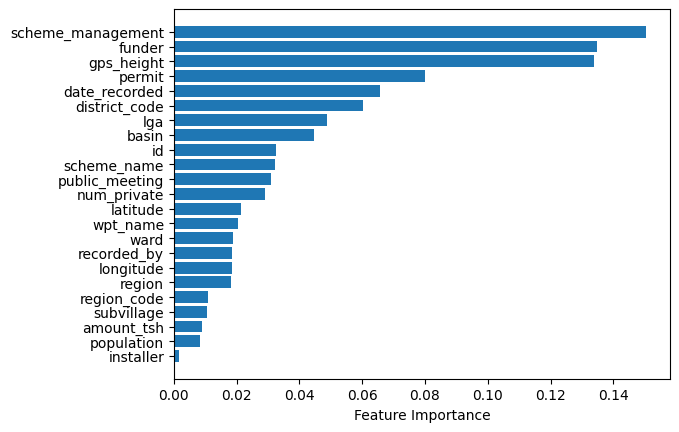

In [77]:
sort = rf_clf.feature_importances_.argsort()
plt.barh(train.columns[sort], rf_clf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [78]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[5800  132  504]
 [ 448  262  144]
 [ 925   62 3603]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      6436
           1       0.57      0.31      0.40       854
           2       0.85      0.78      0.82      4590

    accuracy                           0.81     11880
   macro avg       0.74      0.66      0.69     11880
weighted avg       0.81      0.81      0.81     11880



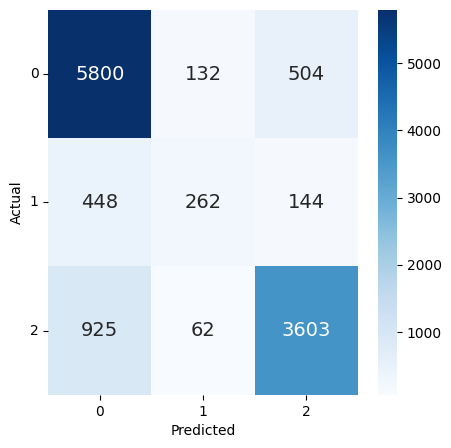

In [79]:
fig, ax = plt.subplots(figsize=(5, 5))
data = confusion_matrix(y_val, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_val), index=np.unique(y_val))
ax = sns.heatmap(df_cm, cmap="Blues", fmt="g", annot=True, annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [80]:
print(Counter(y_pred))

Counter({0: 8951, 2: 5355, 1: 544})


In [81]:
y_pred.sum() / len(y_pred) * 100

75.78451178451179

In [82]:
y_pred = l.inverse_transform(y_pred)
y_pred

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

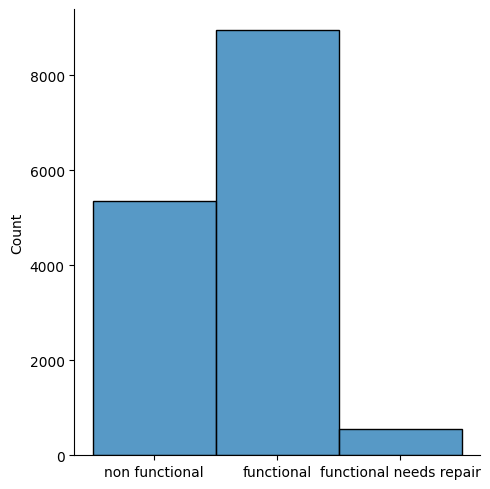

In [83]:
sns.displot(y_pred)

In [84]:
models = ['Random Forest Classifier', 'XgBoost Classifier', 'CatBoost Classifier', 'Bagging Classifier', 'Mixed Voting Classifier', 'Weighted Voting Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier','SVM', 'adaboost X Randomforest']
competition_accuracy = [0.8215, 0.8196, 0.8125, 0.8161, 0.8200,  0.8202, 0.8201, 0.7921, 0.8181, 0.8197  ]

d = {'Model':models, 'Best Competition accuracy': competition_accuracy}   
score_df = pd.DataFrame(d)
score_df 

,Model,Best Competition accuracy
0,Random Forest Classifier,0.8215
1,XgBoost Classifier,0.8196
2,CatBoost Classifier,0.8125
3,Bagging Classifier,0.8161
4,Mixed Voting Classifier,0.8200
5,Weighted Voting Classifier,0.8202
6,AdaBoost Classifier,0.8201
7,Gradient Boosting Classifier,0.7921
8,SVM,0.8181
9,adaboost X Randomforest,0.8197


In [85]:
output = pd.DataFrame({"id": test.id, "status_group": y_pred})
output.to_csv("my_submission.csv", index=False)
print("Your submission was successfully saved!")
my_submission = pd.read_csv("my_submission.csv")
my_submission

Your submission was successfully saved!


,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional
